## Digital Image Processing, ECE419

Ernesto Colon

The Cooper Union Department of Electrical Engineering


March 2nd, 2021

References:
- Digital Image Processing Using Matlab [DIPUM] by Gonzalez et al., 3rd ed
- Digital Image Processing by Gonzalez et al., 4th ed

**The following set of notes and example scripts are part of my independent study sessions and adapted from the
references outlined above. My main reference is DIPUM and complemented with online documentation. As I go through the
theory and textbook examples, I am translating the code and image processing techniques to Python.**

## Morphological Image Processing Notes / Exercises

In [1]:
# Importing the libraries
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
import ec_img_utils
import skimage.util
from skimage import io
from skimage import morphology

**Example 10.1 from DIPUM - An application of dilation**

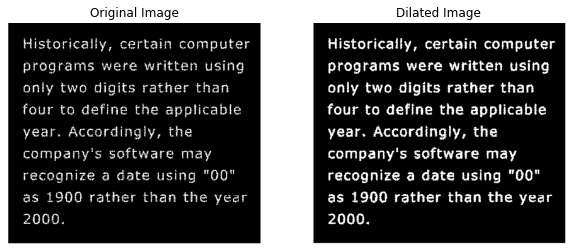

In [2]:
# load broken text image
img_broken_text = io.imread('./images/text-broken.tif')

# define the structuring element
text_strel = np.array([[0., 1., 0.],
                       [1., 1., 1.],
                       [0., 1., 0.]])

# dilate image
img_broken_text_dil = morphology.dilation(img_broken_text, text_strel)

# display both images
fig_text_dil, ax_text_dil = plt.subplots(1, 2, figsize=(10, 5))
ax_text_dil = ax_text_dil.ravel()

ax_text_dil[0].imshow(img_broken_text, cmap='gray')
ax_text_dil[0].set_title("Original Image")
ax_text_dil[0].axis('off')


ax_text_dil[1].imshow(img_broken_text_dil, cmap='gray')
ax_text_dil[1].set_title("Dilated Image")
ax_text_dil[1].axis('off');

Note how the dilated image has expanded the text characters and achieved a better image.

**Example 10.3 from DIPUM - An illustration of erosion**

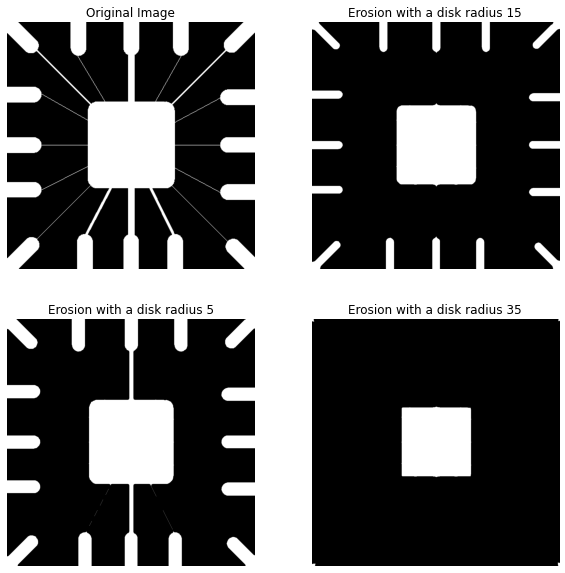

In [3]:
# load the circuit mask image
img_ckt_mask = io.imread('././images/circuitmask.tif')

# create structuring elements
disk_strel_15 = morphology.disk(15)
disk_strel_5 = morphology.disk(5)
disk_strel_35 = morphology.disk(35)

# erode the original image
img_ckt_mask_ero_15 = morphology.erosion(img_ckt_mask, disk_strel_15)
img_ckt_mask_ero_5 = morphology.erosion(img_ckt_mask, disk_strel_5)
img_ckt_mask_ero_35 = morphology.erosion(img_ckt_mask, disk_strel_35)


# display all the images
fig_ckt_ero, ax_ckt_ero = plt.subplots(2, 2, figsize=(10,10))
ax_ckt_ero = ax_ckt_ero.ravel()

ax_ckt_ero[0].imshow(img_ckt_mask, cmap='gray')
ax_ckt_ero[0].set_title("Original Image")
ax_ckt_ero[0].axis('off')

ax_ckt_ero[1].imshow(img_ckt_mask_ero_15, cmap='gray')
ax_ckt_ero[1].set_title("Erosion with a disk radius 15")
ax_ckt_ero[1].axis('off')

ax_ckt_ero[2].imshow(img_ckt_mask_ero_5, cmap='gray')
ax_ckt_ero[2].set_title("Erosion with a disk radius 5")
ax_ckt_ero[2].axis('off')

ax_ckt_ero[3].imshow(img_ckt_mask_ero_35, cmap='gray')
ax_ckt_ero[3].set_title("Erosion with a disk radius 35")
ax_ckt_ero[3].axis('off');

Opening and closing

**Example 10.4 from DIPUM**

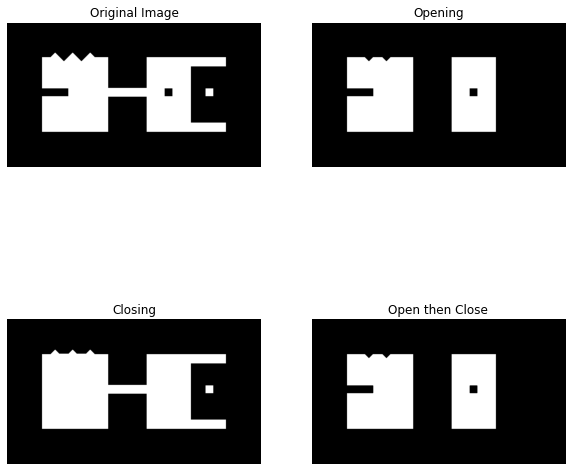

In [4]:
# load the shapes image
img_shapes = io.imread('./images/shapes.tif')

# create structuring element
shapes_strel = morphology.square(40)

# perform opening operation
img_shapes_opening = morphology.opening(img_shapes, shapes_strel)

# perform closing operation
img_shapes_closing = morphology.closing(img_shapes, shapes_strel)

# close the result of the first opening operation
img_shapes_open_close = morphology.closing(img_shapes_opening)

# display the images
fig_shapes, ax_shapes = plt.subplots(2, 2, figsize=(10,10))
ax_shapes = ax_shapes.ravel()

ax_shapes[0].imshow(img_shapes, cmap='gray')
ax_shapes[0].set_title("Original Image")
ax_shapes[0].axis('off')

ax_shapes[1].imshow(img_shapes_opening, cmap='gray')
ax_shapes[1].set_title("Opening")
ax_shapes[1].axis('off')

ax_shapes[2].imshow(img_shapes_closing, cmap='gray')
ax_shapes[2].set_title("Closing")
ax_shapes[2].axis('off')

ax_shapes[3].imshow(img_shapes_open_close, cmap='gray')
ax_shapes[3].set_title("Open then Close")
ax_shapes[3].axis('off');

A sequence of open and closing can be used for **noise reduction**

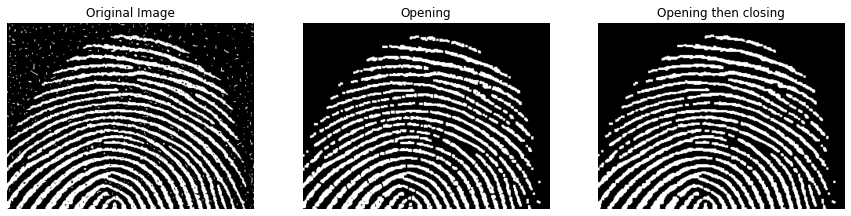

In [5]:
# load noisy thumb pring image
img_thumb_noisy = io.imread('./images/thumbprint.tif')

# create square structuring element of width = 5
square_strel = morphology.square(5)

# open the image to denoise
img_thumb_open = morphology.opening(img_thumb_noisy, square_strel)

# close the image to bridge the gaps left by the opening operation
img_thumb_open_close = morphology.closing(img_thumb_open, square_strel)

# display the images
fig_thumb, ax_thumb = plt.subplots(1, 3, figsize=(15,5))
ax_thumb = ax_thumb.ravel()

ax_thumb[0].imshow(img_thumb_noisy, cmap='gray')
ax_thumb[0].set_title("Original Image")
ax_thumb[0].axis('off')

ax_thumb[1].imshow(img_thumb_open, cmap='gray')
ax_thumb[1].set_title("Opening")
ax_thumb[1].axis('off')

ax_thumb[2].imshow(img_thumb_open_close, cmap='gray')
ax_thumb[2].set_title("Opening then closing")
ax_thumb[2].axis('off');


I want to show the difference between the oepning image shown above and the composite operation to see if we actually
filled in some of the gaps.

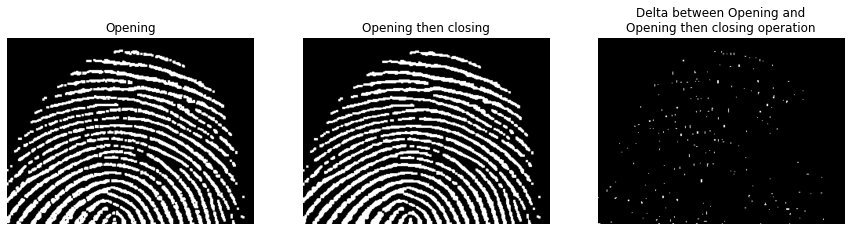

In [6]:
# to compute the delta, we can compute an XOR operation to get the exclusive disjunction sets
img_thumb_opn_cls_delta = np.bitwise_xor(img_thumb_open, img_thumb_open_close)

# display the images
fig_thumb_2, ax_thumb_2 = plt.subplots(1, 3, figsize=(15,5))
ax_thumb_2 = ax_thumb_2.ravel()

ax_thumb_2[0].imshow(img_thumb_open, cmap='gray')
ax_thumb_2[0].set_title("Opening")
ax_thumb_2[0].axis('off')

ax_thumb_2[1].imshow(img_thumb_open_close, cmap='gray')
ax_thumb_2[1].set_title("Opening then closing")
ax_thumb_2[1].axis('off')

ax_thumb_2[2].imshow(img_thumb_opn_cls_delta, cmap='gray')
ax_thumb_2[2].set_title("Delta between Opening and\nOpening then closing operation")
ax_thumb_2[2].axis('off');

Note from the XOR image displayed above that the closing operation performed on the first opening was able to 'fill' in
some of the holes left behind by the opening.

#### Labeling Connected Components

Demonstrating connected components and connectivity between pixels.

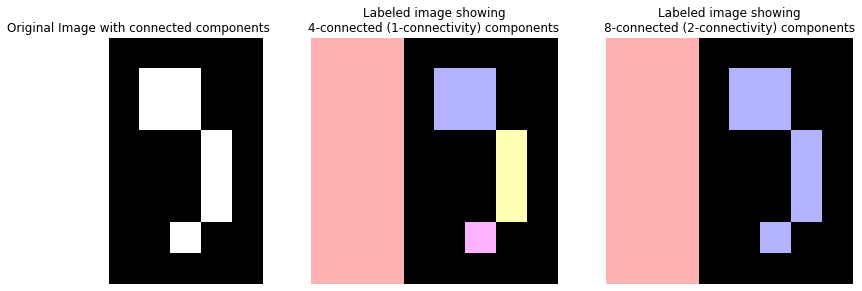

In [7]:
# read in connected components array from csv file
from skimage import measure

img_conn_comp_1 = skimage.img_as_ubyte(np.genfromtxt('./files/connected_comp_1_csv.csv', delimiter=','))

# display the image
fig_conn_comp_1, ax_conn_comp_1 = plt.subplots(1, 3, figsize=(15, 5))
ax_conn_comp_1 = ax_conn_comp_1.ravel()

ax_conn_comp_1[0].imshow(img_conn_comp_1, cmap='gray')
ax_conn_comp_1[0].set_title("Original Image with connected components")
ax_conn_comp_1[0].axis('off')

# label the components using 4-neighbors (called 1-connectivity in scikit-image)
labels_4_neigh = measure.label(img_conn_comp_1, background=0, connectivity=1)

# display labels overlayed with the original image
img_conn_4_neigh_lbl =  skimage.color.label2rgb(labels_4_neigh, img_conn_comp_1, bg_label=0)

# display labeled image
ax_conn_comp_1[1].imshow(img_conn_4_neigh_lbl)
ax_conn_comp_1[1].set_title("Labeled image showing\n4-connected (1-connectivity) components")
ax_conn_comp_1[1].axis('off')

# label the components using 8-neighbors/2-connectivity
labels_8_neigh = measure.label(img_conn_comp_1, background=0, connectivity=2)

# generate the 8-connected labels overlayed with the original image
img_conn_8_neigh_lbl =  skimage.color.label2rgb(labels_8_neigh, img_conn_comp_1, bg_label=0)

# display the labeled image
ax_conn_comp_1[2].imshow(img_conn_8_neigh_lbl)
ax_conn_comp_1[2].set_title("Labeled image showing\n8-connected (2-connectivity) components")
ax_conn_comp_1[2].axis('off');

**Example 10.7 from DIPUM - Identifying clusters of connected components**

Combining dilation and connected-components labeling to identify clusters of comnnected components.

There are 23 connected components in the image


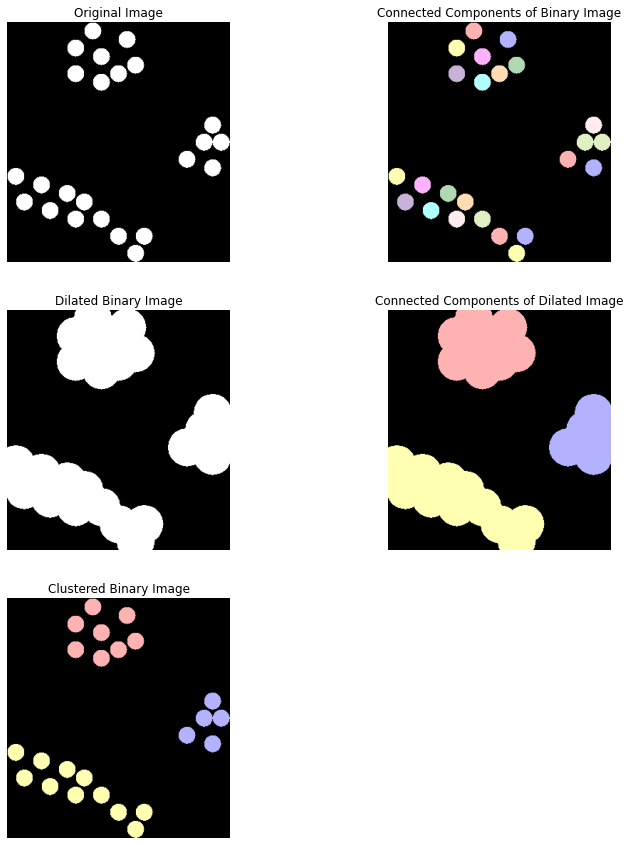

In [8]:
# load blob clusters image
img_blobs = skimage.img_as_ubyte(io.imread('./images/blobs_in_clumps.png'))

# display the original image
fig_blobs, ax_blobs = plt.subplots(3, 2, figsize=(12.5, 15))
ax_blobs = ax_blobs.ravel()

ax_blobs[0].imshow(img_blobs, cmap='gray')
ax_blobs[0].set_title("Original Image")
ax_blobs[0].axis('off')

# compute connected components
img_blobs_conn_comp_lbl, blobs_conn_num = measure.label(img_blobs, background=0, connectivity=2, return_num=True)

print("There are %d connected components in the image" % blobs_conn_num)

# label the connected components
img_blobs_8_lbl = skimage.color.label2rgb(img_blobs_conn_comp_lbl, img_blobs, bg_label=0)

# display the labeled image
ax_blobs[1].imshow(img_blobs_8_lbl)
ax_blobs[1].set_title("Connected Components of Binary Image")
ax_blobs[1].axis('off')

# to identify the three clumps of objects we can dilate the image using a disk structuring element
disk_strel_blobs = morphology.disk(15)
img_blobs_dil = morphology.dilation(img_blobs, disk_strel_blobs)

# display dilated image
ax_blobs[2].imshow(img_blobs_dil, cmap='gray')
ax_blobs[2].set_title("Dilated Binary Image")
ax_blobs[2].axis('off')

# compute the connected components of the dilated image
img_blobs_dil_conn_comp_lbl = measure.label(img_blobs_dil, background=0, connectivity=2)

# label the connected components of the dilated image
img_blobs_dil_conn_lbl = skimage.color.label2rgb(img_blobs_dil_conn_comp_lbl, img_blobs_dil, bg_label=0)

# display the image
ax_blobs[3].imshow(img_blobs_dil_conn_lbl)
ax_blobs[3].set_title("Connected Components of Dilated Image")
ax_blobs[3].axis('off')

# finally, we can index the original image to eliminate the dilated pixels that belong to the background
dil_mask = np.logical_not(img_blobs)

blobs_clustered = img_blobs_dil_conn_lbl
blobs_clustered[dil_mask] = 0

ax_blobs[4].imshow(blobs_clustered)
ax_blobs[4].set_title("Clustered Binary Image")
ax_blobs[4].axis('off')

fig_blobs.delaxes(ax_blobs[5])

#### Morphological Reconstruction

Reconstruction is am morphological transformation involving two images and a structuring element, instead of a single
image and structuring element. One image, the *marker*, is the starting point for the transformation. The other image,
the *mask*, constrains the transformation. The structuring element used defines connectivity (e.g., 4 or 8 connectivity).

If G is a mask and F is a marker, the reconstruction of G from F, denoted by $R_G(F)$, is defined by the following
iterative procedure:

- Initialize $h_1$ to be the marker image, F
- Create a structuring element using $B = np.ones((3,3))$ for 8-connectivity
- Repeat

\begin{equation}
h_{k+1} = (h_k \oplus B)\cap G
\end{equation}

until $h_{k+1} = h_k$.

- Let $R_G(F) = h_{k+1}$

Marker F must be a subset of G, that is, $F \subseteq G$.

Scikit-image has built-in reconstruction algorithms that make the iterative approach described above faster.

**Opening and closing by reconstruction**

The opening by reconstruction method restores the original shapes of the objects that remain after erosion. Similarly,
the closing by reconstruction is the dual of opening by reconstruction in the sense that we perform the operation using
the complement of G.

We define opening by reconstruction of image $G$ by structuring element $B$ as:

$R_G(G \ominus B)$

**Example 10.8 - Opening by reconstruction**

In this example, we are interested in extracting the characters that contain long vertical strikes. We compare the results
between opening and opening by reconstruction.

To extract the vertical strikes, we use a thin vertical structuring element of length proportional to the height of the
characters and erode the image until only objects with vertical strokes of the specified size remain

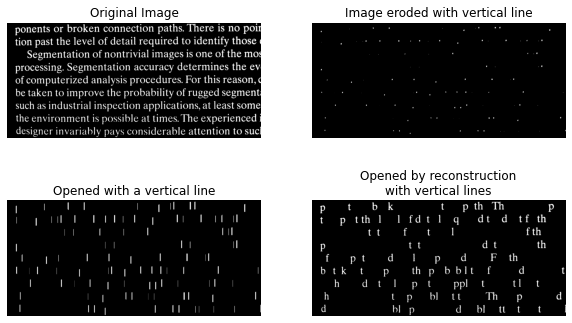

In [9]:
# load book text image
img_book_txt = skimage.img_as_ubyte(io.imread('./images/text-touching-border.tif'))

# erode the image
img_book_erode = morphology.erosion(img_book_txt, np.ones((51, 1)))

# display the results so far
fig_book, ax_book = plt.subplots(2, 2, figsize=(10, 6))
ax_book = ax_book.ravel()

ax_book[0].imshow(img_book_txt, cmap='gray')
ax_book[0].set_title("Original Image")
ax_book[0].axis('off')

ax_book[1].imshow(img_book_erode, cmap='gray')
ax_book[1].set_title("Image eroded with vertical line")
ax_book[1].axis('off')

# open the original image
img_book_open = morphology.opening(img_book_txt, np.ones((51, 1)))

# display the result
ax_book[2].imshow(img_book_open, cmap='gray')
ax_book[2].set_title("Opened with a vertical line")
ax_book[2].axis('off')

# finally, reconstruct the image
img_book_open_by_rec = morphology.reconstruction(seed=img_book_erode, mask=img_book_txt, selem=np.ones((3,3)))

# display the resulting image
ax_book[3].imshow(img_book_open_by_rec, cmap='gray')
ax_book[3].set_title("Opened by reconstruction\nwith vertical lines")
ax_book[3].axis('off');

Note from the results obtained above, that the characters containing the vertical strokes were restored exactly.

#### Filling Holes

We can apply morphological transformations to fill holes in our binary images.

As outlined in scikit-image's documentation, we can fill holes by reconstruction by erosion. The approach is to generate
a marker image with the minimum value of our image, in this case the background pixels (value 0), along the edges. We
then start eroding our mask image with this marker image. The erosion process will expand the minimal values of the seed
image until it encounters a mask image. Our marker and mask images act as the minimum and maximum possible values of
our reconstructed image.

Let $I$ denote a binary image and suppose that we choose the marker image, $F$, to be $0$ everywhere except on the image
border, where it is set to $1 - I$.

\begin{equation}
F(x,y) =
  \begin{cases}
                                   1 - I(x,y) & \text{if $(x,y)$ is on the border of $I$} \\
                                   0 & \text{otherwise}
  \end{cases}
\end{equation}

Then,

$H = [R_{I^c}(F)]^c$

is a binary image equal to $I$ with all holes filled.

https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_holes_and_peaks.html

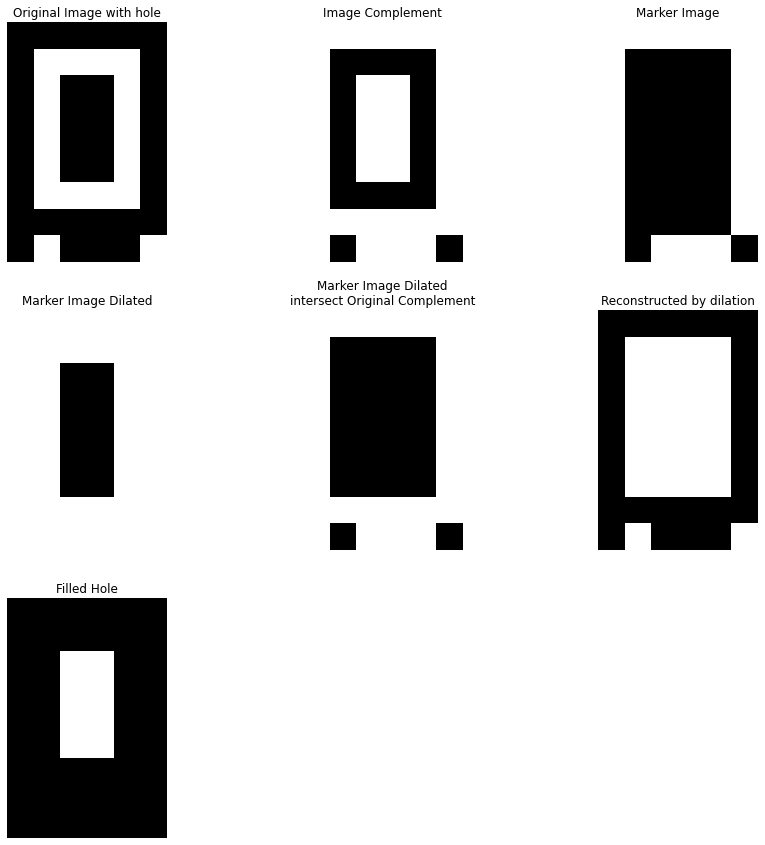

In [10]:
# load hole image
img_hole = skimage.img_as_ubyte(np.genfromtxt('./files/hole_filling.csv', delimiter=','))

# display the images
fig_hole, ax_hole = plt.subplots(3, 3, figsize=(15,15))
ax_hole = ax_hole.ravel()

ax_hole[0].imshow(img_hole, cmap='gray')
ax_hole[0].set_title("Original Image with hole")
ax_hole[0].axis('off')

# compute complement
img_hole_compl = np.logical_not(img_hole)

ax_hole[1].imshow(img_hole_compl, cmap='gray')
ax_hole[1].set_title("Image Complement")
ax_hole[1].axis('off')

# generate marker image
img_hole_mrkr = np.zeros(img_hole.shape)

# top border
img_hole_mrkr[0, :] = 255 - img_hole[0, :]

# bottom border
img_hole_mrkr[-1, :] = 255 - img_hole[-1, :]

# left border
img_hole_mrkr[:, 0] = 255 - img_hole[:, 0]

# right border
img_hole_mrkr[:, -1] = 255 - img_hole[:, -1]

img_hole_mrkr = (img_hole_mrkr).astype(bool)

# display the marker image
ax_hole[2].imshow(img_hole_mrkr, cmap='gray')
ax_hole[2].set_title("Marker Image")
ax_hole[2].axis('off')

# dilate the marker image with structuring element
img_hole_mrkr_dil = morphology.dilation(img_hole_mrkr, np.ones((3,3)))

ax_hole[3].imshow(img_hole_mrkr_dil, cmap='gray')
ax_hole[3].set_title("Marker Image Dilated")
ax_hole[3].axis('off')

# compute reconstruction by dilation
img_hole_recons_dil = np.logical_and(img_hole_mrkr_dil, img_hole_compl)

ax_hole[4].imshow(img_hole_recons_dil, cmap='gray')
ax_hole[4].set_title("Marker Image Dilated\nintersect Original Complement")
ax_hole[4].axis('off')

# compute H
img_hole_recons_dil = np.logical_not(img_hole_recons_dil)

ax_hole[5].imshow(img_hole_recons_dil, cmap='gray')
ax_hole[5].set_title("Reconstructed by dilation")
ax_hole[5].axis('off')

# fill hole
img_hole_filled = np.logical_and(img_hole_recons_dil, img_hole_compl)

ax_hole[6].imshow(img_hole_filled, cmap='gray')
ax_hole[6].set_title("Filled Hole")
ax_hole[6].axis('off')

fig_hole.delaxes(ax_hole[7])
fig_hole.delaxes(ax_hole[8])

Wrapping up the hole filling algorithm in a function

In [48]:
def custom_hole_fill(img):
    """
    Function to fill in holes in an image using morphological reconstruction.
    The algorithm is defined in Section 10.5 of DIPUM, 3rd edition

    @param img: ndarray-like with image to fill holes for
    @return holes_fill: ndarray-like image with filled holes
    @return holes: ndarray-like image with holes
    """
    # convert image to boolean
    img = skimage.img_as_bool(img)

    # compute image complement. We will need it later
    img_compl = np.logical_not(img)

    # structuring element
    strel = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

    # generate initial marker image
    marker = np.zeros(img.shape)

    # top border
    marker[0, :] = 1 - img[0, :]

    # bottom border
    marker[-1, :] = 1 - img[-1, :]

    # left border
    marker[:, 0] = 1 - img[:, 0]

    # right border
    marker[:, -1] = 1 - img[:, -1]

    marker = skimage.img_as_bool(marker)

    flag = True
    while flag:

        # dilate the marker image with structuring element
        marker_dil = morphology.dilation(marker, strel)

        # compute reconstruction by dilation
        holes_fill = np.logical_and(marker_dil, img_compl)

        # repeat until image does not change anymore
        if np.sum(np.abs(skimage.img_as_ubyte(holes_fill) - skimage.img_as_ubyte(marker))) == 0:
            flag = False
        else:
            marker = holes_fill

    # fill hole
    hole = np.logical_and(np.logical_not(holes_fill), img_compl)

    return np.logical_not(holes_fill), hole

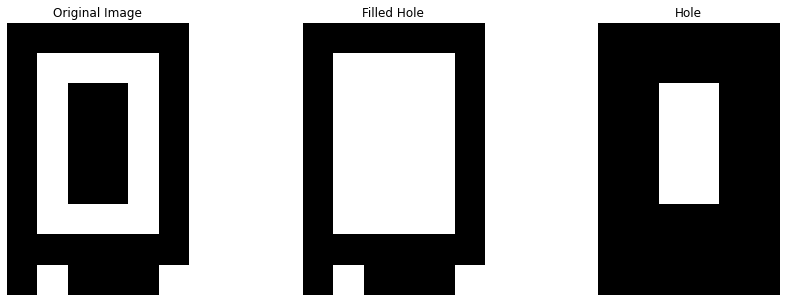

In [49]:
# testing my hole filling function
test_hole_filled, test_hole = custom_hole_fill(img_hole, np.ones((3,3)))

fig_test_hole, ax_test_hole = plt.subplots(1, 3, figsize=(15, 5))
ax_test_hole = ax_test_hole.ravel()

ax_test_hole[0].imshow(img_hole, cmap='gray')
ax_test_hole[0].set_title("Original Image")
ax_test_hole[0].axis('off')

ax_test_hole[1].imshow(test_hole_filled, cmap='gray')
ax_test_hole[1].set_title("Filled Hole")
ax_test_hole[1].axis('off');

ax_test_hole[2].imshow(test_hole, cmap='gray')
ax_test_hole[2].set_title("Hole")
ax_test_hole[2].axis('off');

Trying out my function with the text image

(-0.5, 2017.5, 917.5, -0.5)

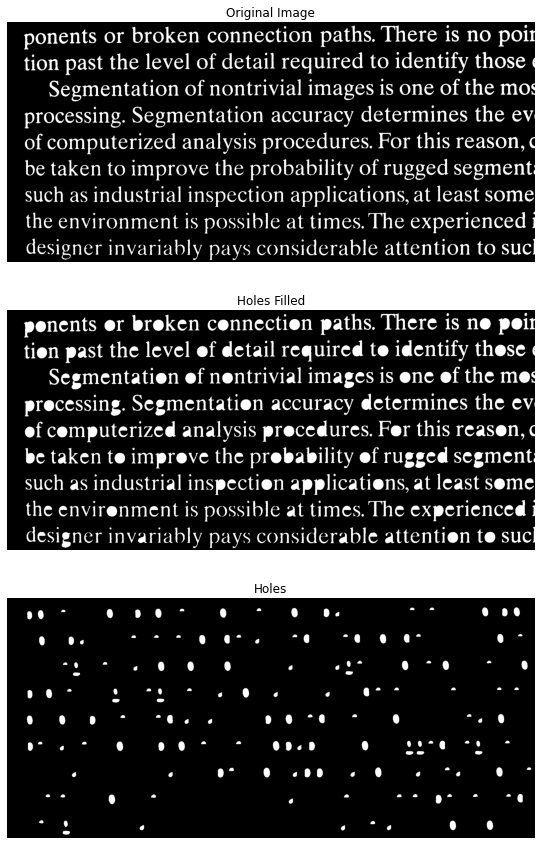

In [53]:
img_text_fill, img_text_holes = custom_hole_fill(img_book_txt, np.ones((3,3)))

# display the results
fig_txt_hole, ax_txt_hole = plt.subplots(3, 1, figsize=(10, 15))
ax_txt_hole = ax_txt_hole.ravel()

ax_txt_hole[0].imshow(img_book_txt, cmap='gray')
ax_txt_hole[0].set_title("Original Image")
ax_txt_hole[0].axis('off')

ax_txt_hole[1].imshow(img_text_fill, cmap='gray')
ax_txt_hole[1].set_title("Holes Filled")
ax_txt_hole[1].axis('off')

ax_txt_hole[2].imshow(img_text_holes, cmap='gray')
ax_txt_hole[2].set_title("Holes")
ax_txt_hole[2].axis('off')


In [54]:
# Let me create a function to perform reconstruction also
def my_morph_recost(init_marker, mask, strel):
    """
    Function to compute the morphological reconstruction given an initial marker image, a mask, and a structuring
    element. The algorithm is defined in Section 10.5 of DIPUM, 3rd edition

    @param init_marker: ndarray-like with initial marker image to start the reconstruction process
    @param mask: ndarray-like with initial mask image to reconstruct
    @param strel: ndarray-like with initial structuring element
    @return h: ndarray-like reconstructed image
    """

    # convert image to boolean
    img = skimage.img_as_bool(mask)

    # initialize marker
    h = skimage.img_as_bool(init_marker)

    flag = True
    while flag:

        #compute dilation of marker image
        dil = morphology.dilation(h, strel)

        # compute reconstruction by dilation
        h_k_1 = np.logical_and(dil, img)

        # repeat until h_{k+1} == h_{k}
        if np.sum(np.abs(skimage.img_as_ubyte(h_k_1) - skimage.img_as_ubyte(h))) == 0:
            flag = False
        else:
            h = h_k_1

    return h

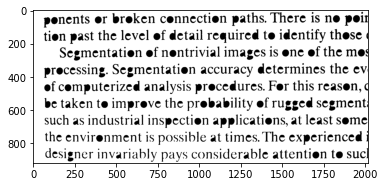

In [52]:
img = img_book_txt

# convert image to boolean
img = skimage.img_as_bool(img)

# compute image complement. We will need it later
img_compl = np.logical_not(img)

strel = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]], dtype=np.uint8)

# generate marker image
marker = np.zeros(img.shape)

# top border
marker[0, :] = 1 - img[0, :]

# bottom border
marker[-1, :] = 1 - img[-1, :]

# left border
marker[:, 0] = 1 - img[:, 0]

# right border
marker[:, -1] = 1 - img[:, -1]

marker = skimage.img_as_bool(marker)

#testing my reconstruction function
test_hole_fill = my_morph_recost(marker, img_compl, strel)

plt.imshow(test_hole_fill, cmap='gray')

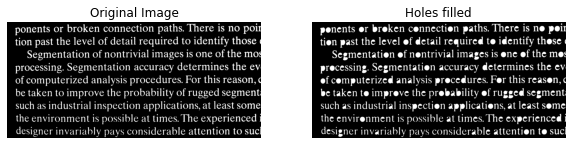

In [20]:
# let me try to write this out myself

# create marker/seed image
img_mrkr_txt = np.copy(img_book_txt)
img_mrkr_txt[1:-1, 1:-1] = img_mrkr_txt.max()

# perform reconstruction by erosion
img_book_txt_hole_fill = morphology.reconstruction(seed=img_mrkr_txt, mask=img_book_txt, method='erosion')

# display results
fig_book_hole, ax_book_hole = plt.subplots(1, 2, figsize=(10,10))
ax_book_hole = ax_book_hole.ravel()

ax_book_hole[0].imshow(img_book_txt, cmap='gray')
ax_book_hole[0].set_title("Original Image")
ax_book_hole[0].axis('off')

ax_book_hole[1].imshow(img_book_txt_hole_fill, cmap='gray')
ax_book_hole[1].set_title("Holes filled")
ax_book_hole[1].axis('off');

#### Boundary Extraction
DEFINE A BOUNDARY

$\beta(A) = A - (A \ominus B)$

In [ ]:
# log triangle image
img_triang = skimage.img_as_ubyte(io.imread('./images/binary-triangle-distorted.tif'))

# perform boundary extraction
bound_strl = np.ones((3,3))

img_triang_erode = morphology.erosion(img_triang, selem=bound_strl)

# extract boundary
img_triang_boundary = img_triang - img_triang_erode

# display the results
fig_triang, ax_triang = plt.subplots(1,3, figsize=(15, 5))
ax_triang = ax_triang.ravel()

ax_triang[0].imshow(img_triang, cmap='gray')
ax_triang[0].set_title("Original Image")
ax_triang[0].axis('off')

ax_triang[1].imshow(img_triang_erode, cmap='gray')
ax_triang[1].set_title("Eroded Image")
ax_triang[1].axis('off')

ax_triang[2].imshow(img_triang_boundary, cmap='gray')
ax_triang[2].set_title("Boundary Image")
ax_triang[2].axis('off');

**Another boundary extraction example**

In [ ]:
# load blood vessels image
img_bld_vss = skimage.util.invert(skimage.img_as_ubyte(io.imread('./images/blood-vessels.tif')))

# erode the original image
img_bld_vss_erod = morphology.erosion(img_bld_vss, selem=bound_strl)

# extract boundary
img_bld_vss_bound = img_bld_vss - img_bld_vss_erod

# display the results
fig_bld, ax_bld = plt.subplots(1,2, figsize=(10, 5))
ax_bld = ax_bld.ravel()

ax_bld[0].imshow(img_bld_vss, cmap='gray')
ax_bld[0].set_title("Original Image")
ax_bld[0].axis('off')

ax_bld[1].imshow(img_bld_vss_bound, cmap='gray')
ax_bld[1].set_title("Boundary Image")
ax_bld[1].axis('off');

Experimenting... Can I find where the holes are in my image? I should be able to

In [ ]:
strel_1 = np.array([[1, 1, 1],
                    [1, 0, 1],
                    [1, 1, 1]], dtype=np.uint8)

#strel_2 = np.logical_not(strel_1)
strel_2 = np.array([[0, 0, 0],
                    [0, 1, 0],
                    [0, 0, 0]], dtype=np.uint8)

In [ ]:
# hit or miss
hit = morphology.erosion(img_book_txt, strel_1)
miss = morphology.erosion(np.logical_not(img_book_txt), strel_2)

hit_or_miss = np.logical_and(hit, miss)

plt.imshow(np.logical_not(hit_or_miss), cmap='gray')

#test = img_book_txt - hit_or_miss
#plt.imshow(test, cmap='gray')

In [ ]:
iter = 50

X_k = np.logical_not(hit_or_miss)
erode_strel = np.array([[0, 1, 0],
                        [1, 1, 1],
                        [0, 1, 0]], dtype=np.uint8)

img_book_compl = np.logical_not(img_book_txt)
for i in range(iter):
    # compute erosion
    X_k =np.logical_and(morphology.dilation(X_k, erode_strel), img_book_compl)


plt.imshow(np.logical_not(X_k), cmap='gray')

In [ ]:
plt.imshow(np.logical_not(img_book_txt),cmap='gray')



In [ ]:
import scipy
test_scipy = scipy.ndimage.binary_fill_holes(img_book_txt, erode_strel)

In [ ]:
plt.imshow(test_scipy, cmap='gray')

In [ ]:
test_2 = scipy.ndimage.binary_dilation(np.zeros(img_book_txt.shape), erode_strel, -1, np.logical_not(img_book_txt),border_value=1,
                                       origin=0)
#morphology.dilation(img_book_txt, erode_strel)

In [ ]:
plt.imshow(test_2, cmap='gray')

In [ ]:
strel = morphology.disk(8)
text_opening = morphology.closing(img_book_txt, strel)
plt.imshow(text_opening, cmap='gray')

In [ ]:
plt.imshow(strel)


In [ ]:
# perform boundary extraction
bound_strl = np.ones((3,3))

test_erode = morphology.erosion(img_book_txt, selem=bound_strl)

# extract boundary
test_bound = img_book_txt - test_erode

plt.imshow(test_bound, cmap='gray')

In [ ]:
plt.imshow(test_erode,cmap='gray')